In [1]:
import json
import warnings

import numpy as np
from pprint import pprint
import Genetic

import pandas as pd
import matplotlib.pyplot as plt


# Results JSON
We collected results for experiments in on different machines. Here we join them into a single results json file.

In [2]:
try:
    # join the genetic_results into a single file
    input_files_paths = [
        "output/genetic_results.json",
        "output/genetic_results_2.json",
        "output/genetic_results_3.json",
        "output/genetic_results_4.json"
    ]
    output_file_path = "output/all_genetic_results.json"
    all = []
    for path in input_files_paths:
        x = json.load(open(path))
        print("+", len(x))
        all += x
    print("=", len(all))
    json.dump(all, open(output_file_path, "w"))
except FileNotFoundError as e:
    print("No output file found")
    warnings.warn("No output file found")

No output file found


/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_64323/4279714079.py:19: UserWarning: No output file found
  warnings.warn("No output file found")


# Analyse the genetic results of our first experiments

In [3]:
# load the json
results = json.load(open("output/genetic_results_experiment1.json"))

df = pd.DataFrame(results)
# remove duplicate experiments
df = df.drop_duplicates()
print("Num experiment runs (after removing duplicates):", df.shape[0])
# column for instance names
df = df.rename(columns={"instance": "instance_path"})
df["instance"] = df.instance_path.str.extract(r'/([^/.]+)\.')
df.elitism = df.elitism.round(2)
# sort the results by best fitness
df.sort_values(by=["instance", "best_fitness"], ascending=False, inplace=True)
df#[["instance_path", "instance"]]

Num experiment runs (after removing duplicates): 4388


,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
2408,ihtc2024_test_dataset/test10.json,0.0500,0.60,100,linear_ranked_selection,random_crossover,True,922,-2.069837e+09,test10
2405,ihtc2024_test_dataset/test10.json,0.0500,0.35,100,linear_ranked_selection,random_crossover,False,901,-2.105138e+09,test10
2409,ihtc2024_test_dataset/test10.json,0.0500,0.60,100,linear_ranked_selection,random_crossover,False,999,-2.114137e+09,test10
2356,ihtc2024_test_dataset/test10.json,0.0500,0.35,100,roulette_selection,random_crossover,True,783,-2.120637e+09,test10
2449,ihtc2024_test_dataset/test10.json,0.0500,0.10,100,exponential_ranked_selection,random_crossover,False,566,-2.141937e+09,test10
...,...,...,...,...,...,...,...,...,...,...
4675,ihtc2024_test_dataset/test01.json,0.8333,1.00,10,linear_ranked_selection,random_crossover,False,100,-3.553015e+08,test01
4703,ihtc2024_test_dataset/test01.json,1.0000,1.00,10,linear_ranked_selection,random_crossover,False,100,-3.553015e+08,test01
4731,ihtc2024_test_dataset/test01.json,0.0000,1.00,10,linear_ranked_selection,single_point_crossover,False,100,-3.553015e+08,test01
4759,ihtc2024_test_dataset/test01.json,0.1667,1.00,10,linear_ranked_selection,single_point_crossover,False,100,-3.553015e+08,test01


In [4]:
df.loc[df.groupby("instance").best_fitness.idxmax()]

,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
2305,ihtc2024_test_dataset/test01.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,276,-1.404022e+08,test01
1973,ihtc2024_test_dataset/test02.json,0.05,0.35,100,linear_ranked_selection,random_crossover,False,624,-1.546013e+08,test02
2117,ihtc2024_test_dataset/test03.json,0.05,0.35,100,linear_ranked_selection,random_crossover,False,400,-6.100547e+07,test03
1396,ihtc2024_test_dataset/test04.json,0.05,0.35,100,linear_ranked_selection,random_crossover,True,999,-7.400366e+07,test04
1872,ihtc2024_test_dataset/test05.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,417,-1.432023e+08,test05
2597,ihtc2024_test_dataset/test06.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,False,999,-1.481086e+08,test06
2736,ihtc2024_test_dataset/test07.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,983,-4.254052e+08,test07
1585,ihtc2024_test_dataset/test08.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,900,-5.673182e+08,test08
1729,ihtc2024_test_dataset/test09.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,834,-6.166134e+08,test09
2408,ihtc2024_test_dataset/test10.json,0.05,0.60,100,linear_ranked_selection,random_crossover,True,922,-2.069837e+09,test10


Text(0.5, 1.0, 'Best fitnesses (median=-2.76e+08)')

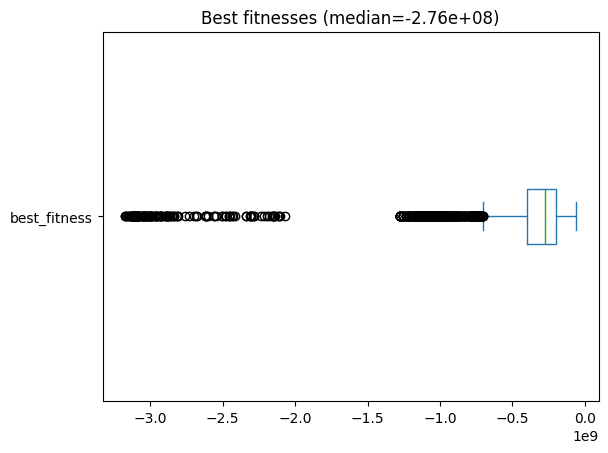

In [5]:
#df.boxplot(column=["best_fitness"], vert=False)
(df.best_fitness).plot.box(vert=False)
plt.title(f"Best fitnesses (median={round(df.best_fitness.median()):.2e})")

Text(0, 0.5, 'Best fitness')

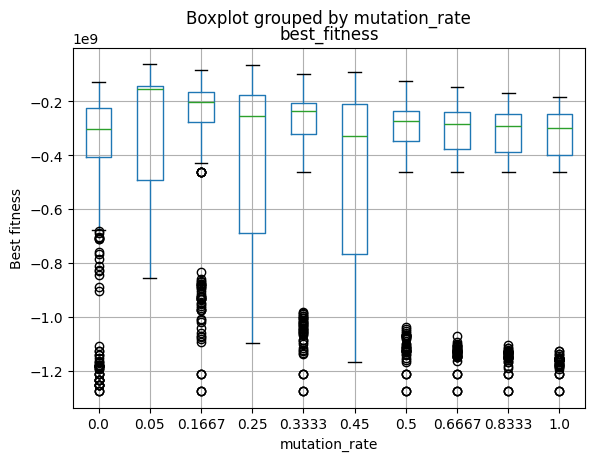

In [6]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="mutation_rate")
ax.set_ylabel("Best fitness")

Text(0, 0.5, 'Best fitness')

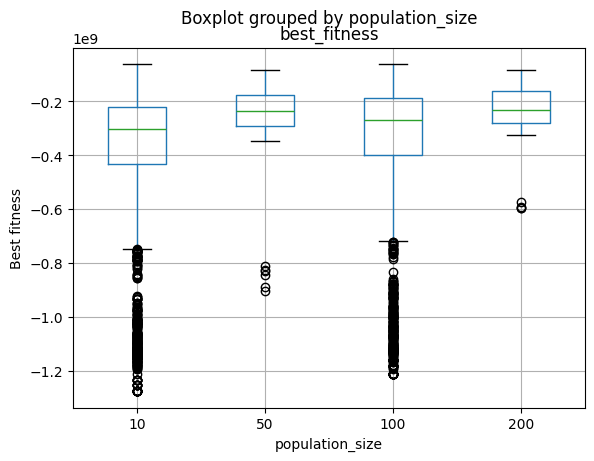

In [7]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="population_size")
ax.set_ylabel("Best fitness")

Text(0, 0.5, '')

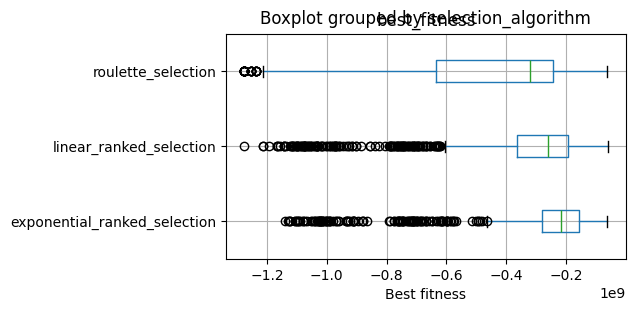

In [8]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="selection_algorithm", vert=False, figsize=(5, 3))
ax.set_xlabel("Best fitness")
ax.set_ylabel("")


Text(0, 0.5, '')

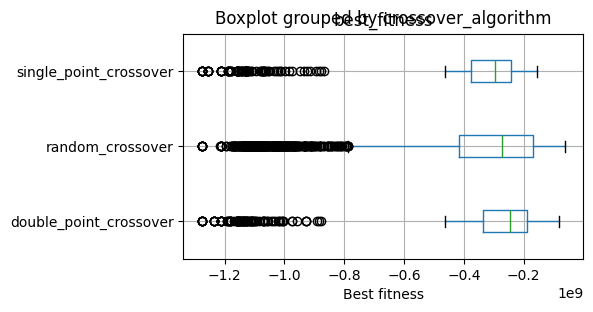

In [9]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="crossover_algorithm", vert=False, figsize=(5, 3))
ax.set_xlabel("Best fitness")
ax.set_ylabel("")

Text(0, 0.5, 'Best fitness')

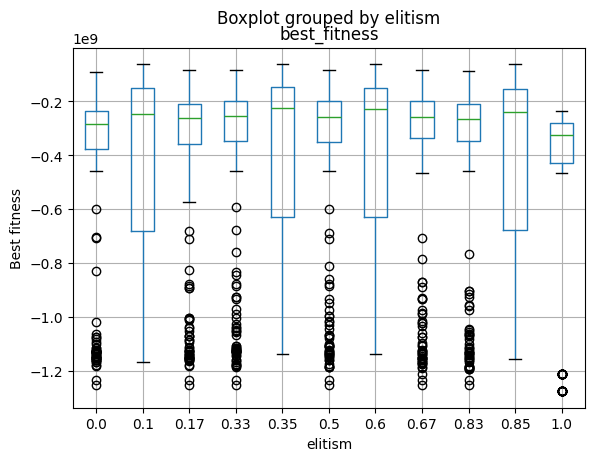

In [10]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="elitism")
ax.set_ylabel("Best fitness")

Text(0.5, 0.98, 'Time step of termination (patience ~ 100)')

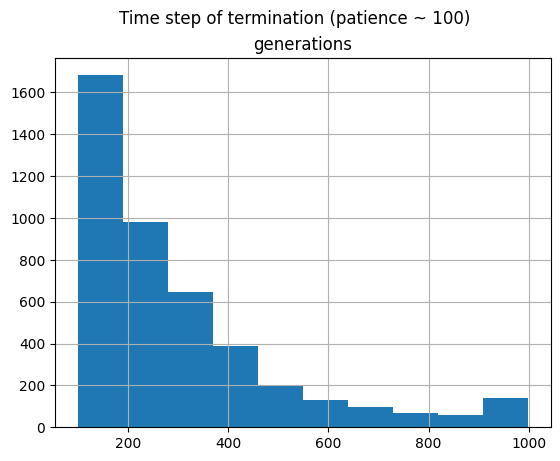

In [11]:
df.hist(column="generations")
plt.suptitle("Time step of termination (patience ~ 100)")


# Analyse the results of the second experiment

In [12]:
# load the json
results = json.load(open("output/genetic_results_experiment2.json"))

df = pd.DataFrame(results)
# remove duplicate experiments
df = df.drop_duplicates()
print("Num experiment runs (after removing duplicates):", df.shape[0])
# column for instance names
df = df.rename(columns={"instance": "instance_path"})
df["instance"] = df.instance_path.str.extract(r'/([^/.]+)\.')
df.elitism = df.elitism.round(2)
# sort the results by best fitness
df.sort_values(by=["instance", "best_fitness"], ascending=False, inplace=True)
df#[["instance_path", "instance"]]

Num experiment runs (after removing duplicates): 2094


,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
1132,ihtc2024_test_dataset/test10.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,99,-1.000600e+14,test10
1131,ihtc2024_test_dataset/test10.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,99,-1.001500e+14,test10
1796,ihtc2024_test_dataset/test10.json,0.05,0.35,1000,linear_ranked_selection,random_crossover,True,99,-1.010900e+14,test10
1794,ihtc2024_test_dataset/test10.json,0.05,0.10,1000,linear_ranked_selection,random_crossover,True,99,-1.031800e+14,test10
1136,ihtc2024_test_dataset/test10.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,False,99,-1.036600e+14,test10
...,...,...,...,...,...,...,...,...,...,...
926,ihtc2024_test_dataset/test01.json,0.45,0.35,10,roulette_selection,random_crossover,False,13,-3.690000e+12,test01
973,ihtc2024_test_dataset/test01.json,0.45,0.35,10,linear_ranked_selection,random_crossover,True,13,-3.850000e+12,test01
914,ihtc2024_test_dataset/test01.json,0.25,0.60,10,roulette_selection,random_crossover,False,12,-3.990000e+12,test01
965,ihtc2024_test_dataset/test01.json,0.25,0.85,10,linear_ranked_selection,random_crossover,True,25,-4.150000e+12,test01


In [13]:
winners = df.loc[df.groupby("instance").best_fitness.idxmax()]
display(winners)


,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
947,ihtc2024_test_dataset/test01.json,0.05,0.60,100,linear_ranked_selection,random_crossover,True,99,-4.700000e+11,test01
1581,ihtc2024_test_dataset/test02.json,0.05,0.35,1000,linear_ranked_selection,random_crossover,False,65,-5.100000e+11,test02
747,ihtc2024_test_dataset/test03.json,0.05,0.10,100,roulette_selection,random_crossover,True,64,-3.900000e+11,test03
131,ihtc2024_test_dataset/test04.json,0.05,0.60,100,exponential_ranked_selection,random_crossover,True,94,-1.950000e+12,test04
559,ihtc2024_test_dataset/test05.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,True,51,-1.800000e+12,test05
1280,ihtc2024_test_dataset/test06.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,False,99,-2.980000e+12,test06
1419,ihtc2024_test_dataset/test07.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,99,-9.830000e+12,test07
268,ihtc2024_test_dataset/test08.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,99,-5.740000e+12,test08
416,ihtc2024_test_dataset/test09.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,False,99,-2.760000e+13,test09
1132,ihtc2024_test_dataset/test10.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,99,-1.000600e+14,test10


In [14]:
#

Text(0.5, 1.0, 'Best fitnesses (median=-6.81e+12)')

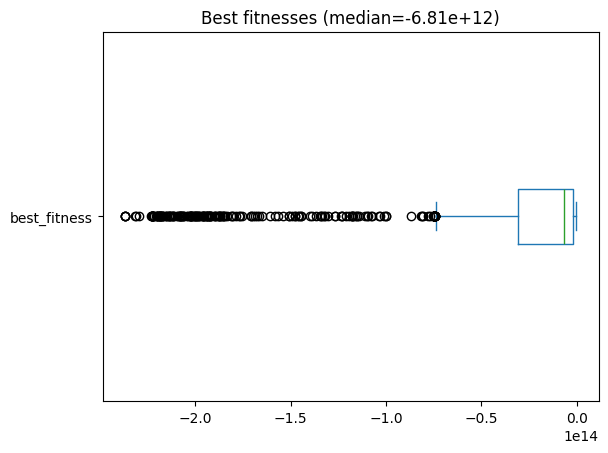

In [15]:
#df.boxplot(column=["best_fitness"], vert=False)
(df.best_fitness).plot.box(vert=False)
plt.title(f"Best fitnesses (median={round(df.best_fitness.median()):.2e})")

/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_64323/1580394459.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df[df.best_fitness > threshold][df.mutation_rate != 0.1].boxplot(column="best_fitness", by="mutation_rate")


Text(0, 0.5, 'Best fitness')

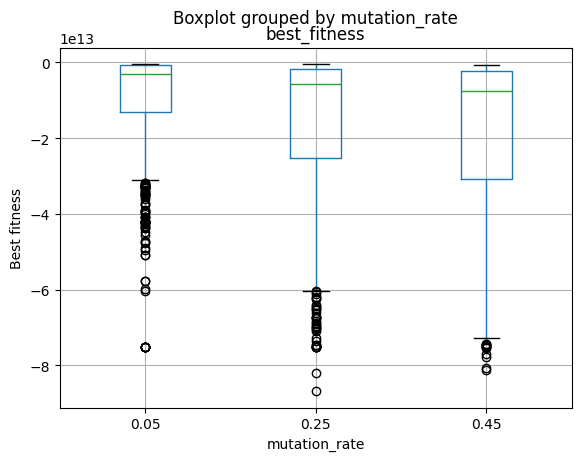

In [16]:
threshold = -1.0e14
ax = df[df.best_fitness > threshold][df.mutation_rate != 0.1].boxplot(column="best_fitness", by="mutation_rate")
ax.set_ylabel("Best fitness")

Text(0, 0.5, 'Best fitness')

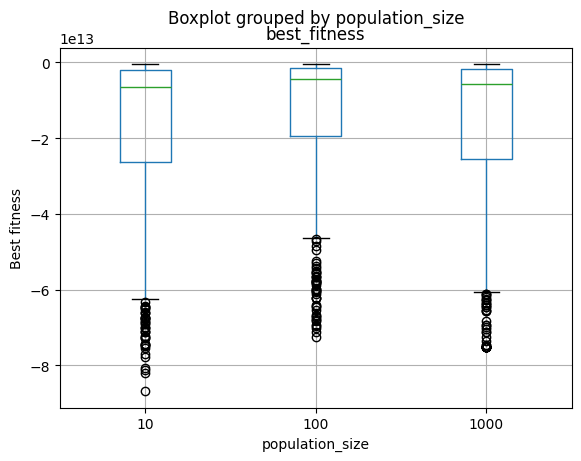

In [17]:
threshold = -1.0e14
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="population_size")
ax.set_ylabel("Best fitness")

Text(0, 0.5, '')

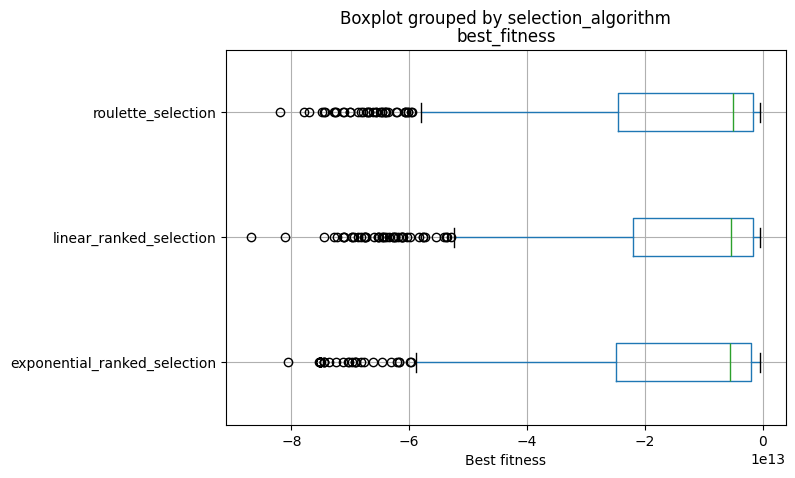

In [18]:
threshold = -1.0e14
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="selection_algorithm", vert=False, figsize=(7, 5))
ax.set_xlabel("Best fitness")
ax.set_ylabel("")


Text(0, 0.5, 'Best fitness')

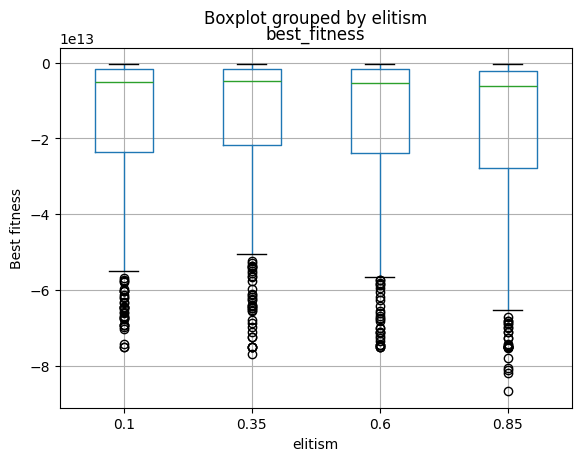

In [19]:
threshold = -1.0e14
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="elitism")
ax.set_ylabel("Best fitness")

Text(0, 0.5, 'Best fitness')

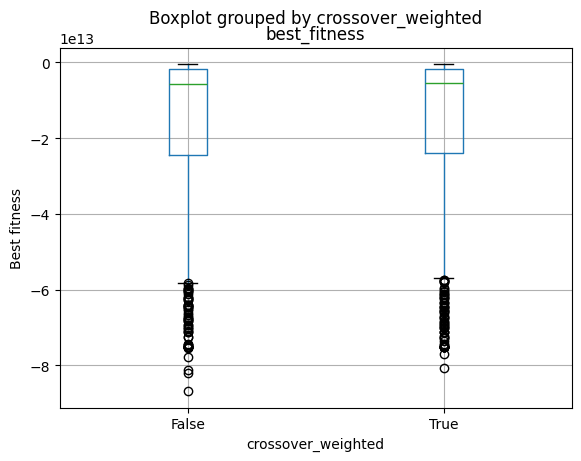

In [20]:
threshold = -1.0e14
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="crossover_weighted")
ax.set_ylabel("Best fitness")

Text(0.5, 0.98, 'Time step of termination (patience ~ 100)')

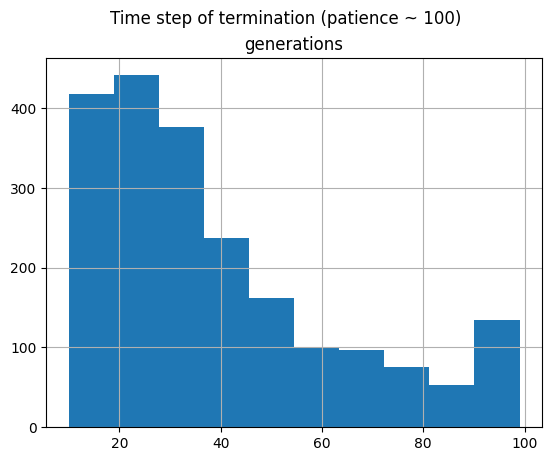

In [21]:
df.hist(column="generations")
plt.suptitle("Time step of termination (patience ~ 100)")


In [23]:
## run with optimal params
## execute all these
#for row in winners.itertuples():
#    for i in range(5):
#        Genetic.main(row.instance_path,
#                     mutation_rate=0.05,
#                     elitism=0.35,
#                     selection_algorithm=Genetic.GeneticSolver.roulette_selection,
#                     population_size=100,
#                     crossover_weighted=True,
#                     verbose=False,
#                     random_seed=0
#                     )